In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1)),
    # N x 32 x 24 x 24
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
    # N x 32 x 12 x 12
    nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1)),
    # N x 64 x 10 x 10
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
    # N x 64 x 5 x 5
    nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1)),
    # N x 64 x 3 x 3
    nn.ReLU(),
    # N x 64 x 3 x 3
    nn.Flatten(),
    # N x 576
    nn.Linear(576, 10)
)

In [2]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.1)

In [3]:
from torchvision import datasets, transforms

# Load MNIST dataset
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)
# Example usage: Accessing the first batch
images, labels = next(iter(data_loader))
print(images.shape)  # Output: torch.Size([64, 1, 28, 28])
print(labels.shape)  # Output: torch.Size([64])

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9912422/9912422 [00:00<00:00, 16151307.77it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28881/28881 [00:00<00:00, 1121336.08it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1648877/1648877 [00:00<00:00, 10030997.66it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4542/4542 [00:00<00:00, 3831562.50it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [4]:
for t, (images, labels) in enumerate(data_loader):
    optimizer.zero_grad()
    output = model(images)
    loss = F.cross_entropy(output, labels)
    loss.backward()
    optimizer.step()
    if t % 100 == 0:
      print(loss)

tensor(2.2991, grad_fn=<NllLossBackward0>)
tensor(0.5002, grad_fn=<NllLossBackward0>)
tensor(0.2392, grad_fn=<NllLossBackward0>)
tensor(0.1331, grad_fn=<NllLossBackward0>)
tensor(0.0520, grad_fn=<NllLossBackward0>)
tensor(0.1286, grad_fn=<NllLossBackward0>)
tensor(0.1230, grad_fn=<NllLossBackward0>)
tensor(0.1118, grad_fn=<NllLossBackward0>)
tensor(0.0210, grad_fn=<NllLossBackward0>)
tensor(0.1607, grad_fn=<NllLossBackward0>)


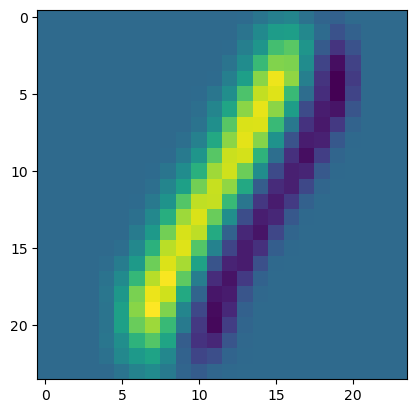

In [5]:
import matplotlib.pyplot as plt
plt.imshow(model[0](images)[0][0].detach().numpy()) # after the 0th layer, 0th image, 0th kernel output
plt.show()

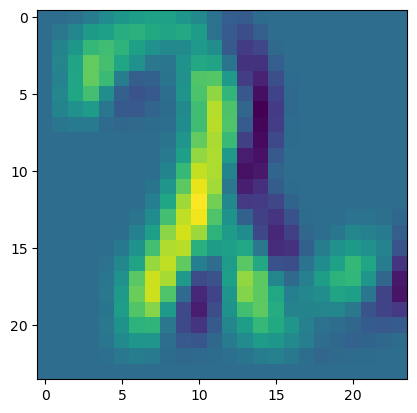

In [6]:
plt.imshow(model[0](images)[1][0].detach().numpy()) # after the 0th layer, 1th image, 0th kernel output
plt.show()

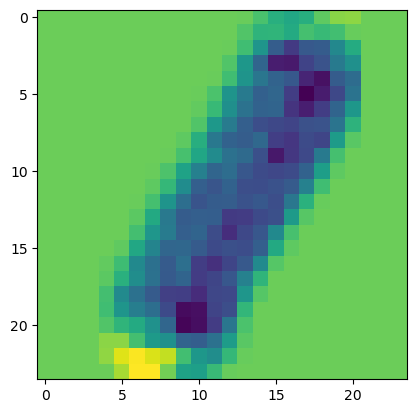

In [7]:
plt.imshow(model[0](images)[0][1].detach().numpy()) # after the 0th layer, 0th image, 1th kernel output
plt.show()

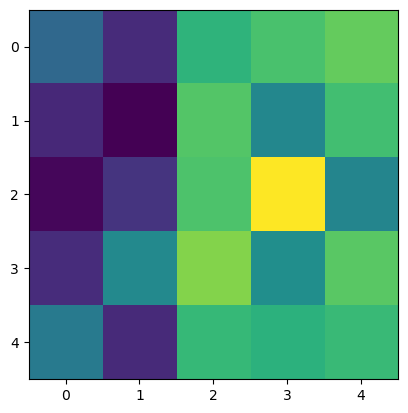

In [8]:
plt.imshow(model[0].weight.data[0,0].detach().numpy()) # of the 0th conv layer, 0th kernel, 0th input-layer visualization
plt.show()

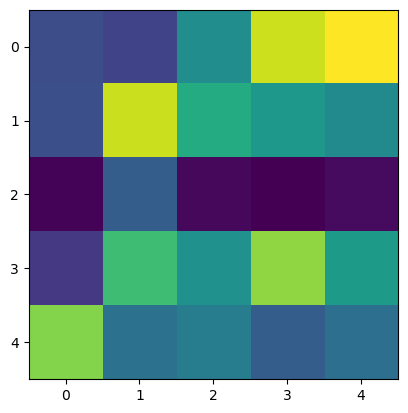

In [9]:
plt.imshow(model[0].weight.data[1,0].detach().numpy()) # of the 0th conv layer, 0th kernel, 0th input-layer visualization
plt.show()